In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r"C:\Users\murad\Downloads\crim_index_df.csv", index_col = 0)
data.rename(columns = {'Criminality ':'Criminality'}, inplace = True)
data = data.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
data = data.applymap(lambda x: None if x == 'None' else x)
data.head()


,Criminality,GDP per capita,Corruption Perception Index,Urban Population,Gini Rate,Unemployment Rate,Political Stability and Absence of Violence,Gun Ownership Rate,Part of the world,Incarceration rate,Alcohol consumption per capita,Poverty rate,Mafia-style groups,Inflation,Literacy Rate,Population density
Country,,,,,,,,,,,,,,,,
Myanmar,8.15,1.38,20.00,32.1,30.7,1.5,-2.21,1.6,Asia,171.0,17.6,24.8,9.50,NaN,93.09,80.67
Venezuela,6.72,3.47,13.00,88.4,39.0,7.5,-1.26,18.5,America,134.0,14.9,33.1,9.50,318.00,95.40,31.62
Nicaragua,5.72,2.60,17.00,59.8,46.2,5.2,-0.35,5.2,America,332.0,15.9,24.9,5.00,7.46,82.47,54.08
Turkmenistan,4.40,12.93,18.00,54.0,40.8,4.0,-0.10,0.4,Asia,552.0,17.8,NaN,2.50,6.72,99.69,13.36
Equatorial Guinea,4.38,6.50,17.00,74.4,NaN,8.5,-0.07,12.5,Africa,63.0,15.5,76.8,1.00,5.00,95.20,60.96


In [ ]:
columns_to_convert = [col for col in data.columns if col != 'Part of the world'][:-2]
data[columns_to_convert] = data[columns_to_convert].astype(float)
instr= [col for col in data.columns if col != 'Part of the world'][-2:]
data['Criminality'] = data['Criminality']*10

In [ ]:
data.describe()

,Criminality,GDP per capita,Corruption Perception Index,Urban Population,Gini Rate,Unemployment Rate,Political Stability and Absence of Violence,Gun Ownership Rate,Incarceration rate,Alcohol consumption per capita,Poverty rate,Mafia-style groups,Inflation,Literacy Rate,Population density
count,146.000000,146.000000,146.000000,146.000000,137.000000,146.000000,145.000000,144.000000,145.000000,142.000000,125.000000,146.000000,134.000000,145.000000,146.000000
mean,51.831507,21.145205,46.013699,63.752055,37.289051,7.570411,0.005103,11.047222,172.675862,16.356338,22.690400,4.263699,12.769776,90.373241,119.701671
std,12.158299,28.591535,18.602553,21.872232,7.875023,5.217878,0.842763,13.400584,127.454397,7.877515,13.602463,2.322451,35.781587,12.760596,128.723159
min,22.700000,1.000000,13.000000,13.700000,23.200000,0.100000,-2.470000,0.000000,31.000000,1.000000,1.100000,1.000000,-2.470000,38.450000,1.172000
25%,43.800000,3.565000,33.000000,50.350000,31.700000,4.100000,-0.550000,2.575000,86.000000,12.800000,13.600000,2.500000,2.925000,86.870000,28.580000
50%,50.650000,7.920000,42.000000,66.700000,35.700000,6.100000,0.030000,7.400000,139.000000,15.400000,20.100000,4.000000,4.850000,95.540000,79.630000
75%,60.150000,28.475000,57.750000,81.600000,41.900000,9.650000,0.650000,15.825000,224.000000,19.275000,26.400000,6.000000,8.000000,99.000000,139.350000
max,81.500000,184.080000,90.000000,100.000000,63.000000,28.800000,1.800000,120.500000,799.000000,62.800000,76.800000,9.500000,318.000000,100.000000,651.200000


In [ ]:
(data[columns_to_convert+instr].corr())

,Criminality,GDP per capita,Corruption Perception Index,Urban Population,Gini Rate,Unemployment Rate,Political Stability and Absence of Violence,Gun Ownership Rate,Incarceration rate,Alcohol consumption per capita,Poverty rate,Mafia-style groups,Inflation,Literacy Rate,Population density
Criminality,1.000000,-0.381908,-0.527399,-0.026152,0.259673,0.021728,-0.633013,-0.037638,0.041274,0.052599,0.169972,0.636615,0.190902,-0.188880,0.005700
GDP per capita,-0.381908,1.000000,0.756636,0.366312,-0.297856,-0.252796,0.541149,0.426374,-0.132595,-0.234365,-0.319968,-0.117121,-0.145528,0.401570,0.093683
Corruption Perception Index,-0.527399,0.756636,1.000000,0.400381,-0.310992,-0.125714,0.708749,0.341954,-0.064402,-0.201009,-0.431526,-0.196269,-0.254418,0.405532,0.094188
Urban Population,-0.026152,0.366312,0.400381,1.000000,-0.117439,0.025088,0.246246,0.329312,0.088969,-0.259833,-0.227574,0.067631,0.115356,0.438945,-0.109979
Gini Rate,0.259673,-0.297856,-0.310992,-0.117439,1.000000,0.309101,-0.095603,-0.110405,0.250755,0.071149,0.569744,0.131719,0.051931,-0.190965,-0.121126
Unemployment Rate,0.021728,-0.252796,-0.125714,0.025088,0.309101,1.000000,-0.151074,0.040905,0.061213,0.197460,0.213143,0.048402,0.057913,-0.113210,-0.092525
Political Stability and Absence of Violence,-0.633013,0.541149,0.708749,0.246246,-0.095603,-0.151074,1.000000,0.172713,0.026371,-0.193985,-0.266152,-0.330862,-0.269884,0.434678,-0.032080
Gun Ownership Rate,-0.037638,0.426374,0.341954,0.329312,-0.110405,0.040905,0.172713,1.000000,0.149139,-0.055922,-0.159088,0.067669,0.075981,0.302143,-0.118887
Incarceration rate,0.041274,-0.132595,-0.064402,0.088969,0.250755,0.061213,0.026371,0.149139,1.000000,0.157216,-0.062660,0.099626,-0.001135,0.203175,-0.033427
Alcohol consumption per capita,0.052599,-0.234365,-0.201009,-0.259833,0.071149,0.197460,-0.193985,-0.055922,0.157216,1.000000,0.084905,-0.026845,0.100575,0.012810,0.012264


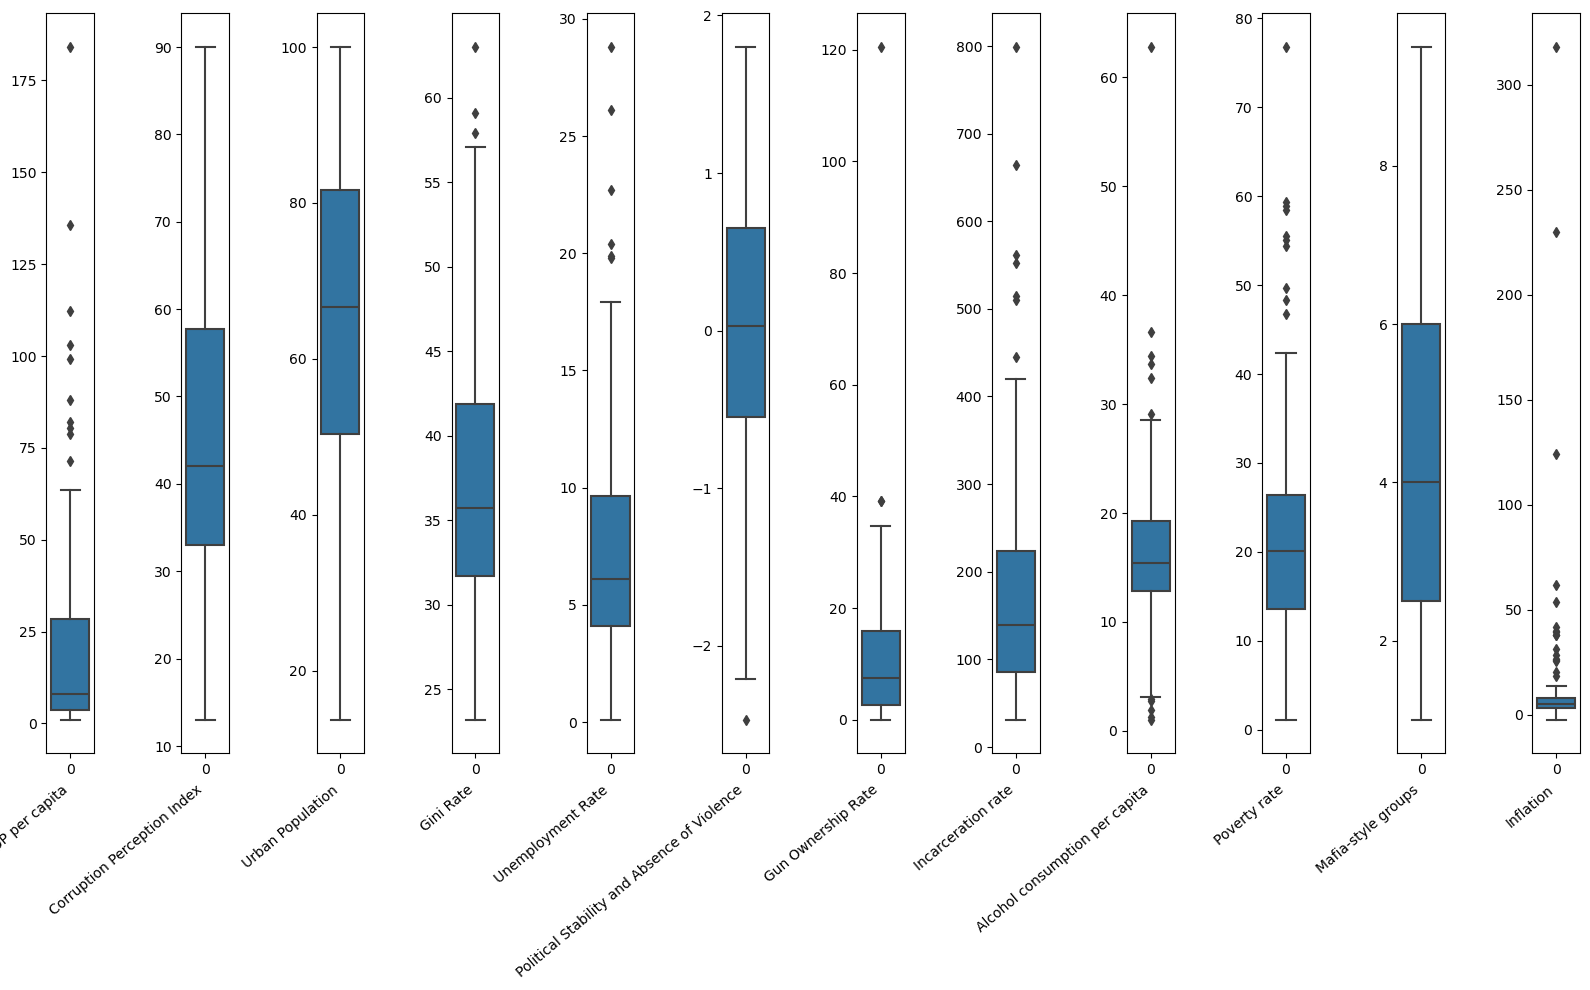

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columns_to_convert[1:]):
    ax = plt.subplot(1, len(columns_to_convert)-1, i+1)
    sns.boxplot(data=data[columns_to_convert][col], orient='v', ax=ax)
    ax.set_xlabel(col, rotation=40, ha='right')

plt.tight_layout()
plt.savefig('boxplot.png');


In [ ]:
# data['Population density']= data['Population density'].replace(max(data['Population density']), np.median(data['Population density']))
data['Gun Ownership Rate']= data['Gun Ownership Rate'].replace(max(data['Gun Ownership Rate']), np.median(data['Gun Ownership Rate']))
data['Poverty rate']= data['Poverty rate'].replace(max(data['Poverty rate']), np.median(data['Poverty rate']))
data['Alcohol consumption per capita']= data['Alcohol consumption per capita'].replace(max(data['Alcohol consumption per capita']), np.median(data['Alcohol consumption per capita']))
data['Incarceration rate']= data['Incarceration rate'].replace(max(data['Incarceration rate']), np.median(data['Incarceration rate']))
data['Incarceration rate']= data['Incarceration rate'].replace(max(data['Incarceration rate']), np.median(data['Incarceration rate']))
data['Gini Rate']= data['Gini Rate'].replace(max(data['Gini Rate']), np.median(data['Gini Rate']))
data['GDP per capita']= data['GDP per capita'].replace(max(data['GDP per capita']), np.median(data['GDP per capita']))
data['GDP per capita']= data['GDP per capita'].replace(max(data['GDP per capita']), np.median(data['GDP per capita']))
data['Unemployment Rate']= data['Unemployment Rate'].replace(max(data['Unemployment Rate']), np.median(data['Unemployment Rate']))
data['Unemployment Rate']= data['Unemployment Rate'].replace(max(data['Unemployment Rate']), np.median(data['Unemployment Rate']))


In [ ]:
data['Inflation']= data['Inflation'].replace(max(data['Inflation']), np.median(data['Inflation']))
data['Inflation'] = np.where(data['Inflation'] == max(data['Inflation']), np.median(data['Inflation']), data['Inflation'])

# data['Inflation']= data['Inflation'].replace(max(data['Inflation']), np.median(data['Inflation']))
# data['Inflation']= data['Inflation'].replace(max(data['Inflation']), np.median(data['Inflation']))
data[columns_to_convert] = data[columns_to_convert].fillna(data[columns_to_convert].median())
data[instr] = data[instr].fillna(data[instr].median())

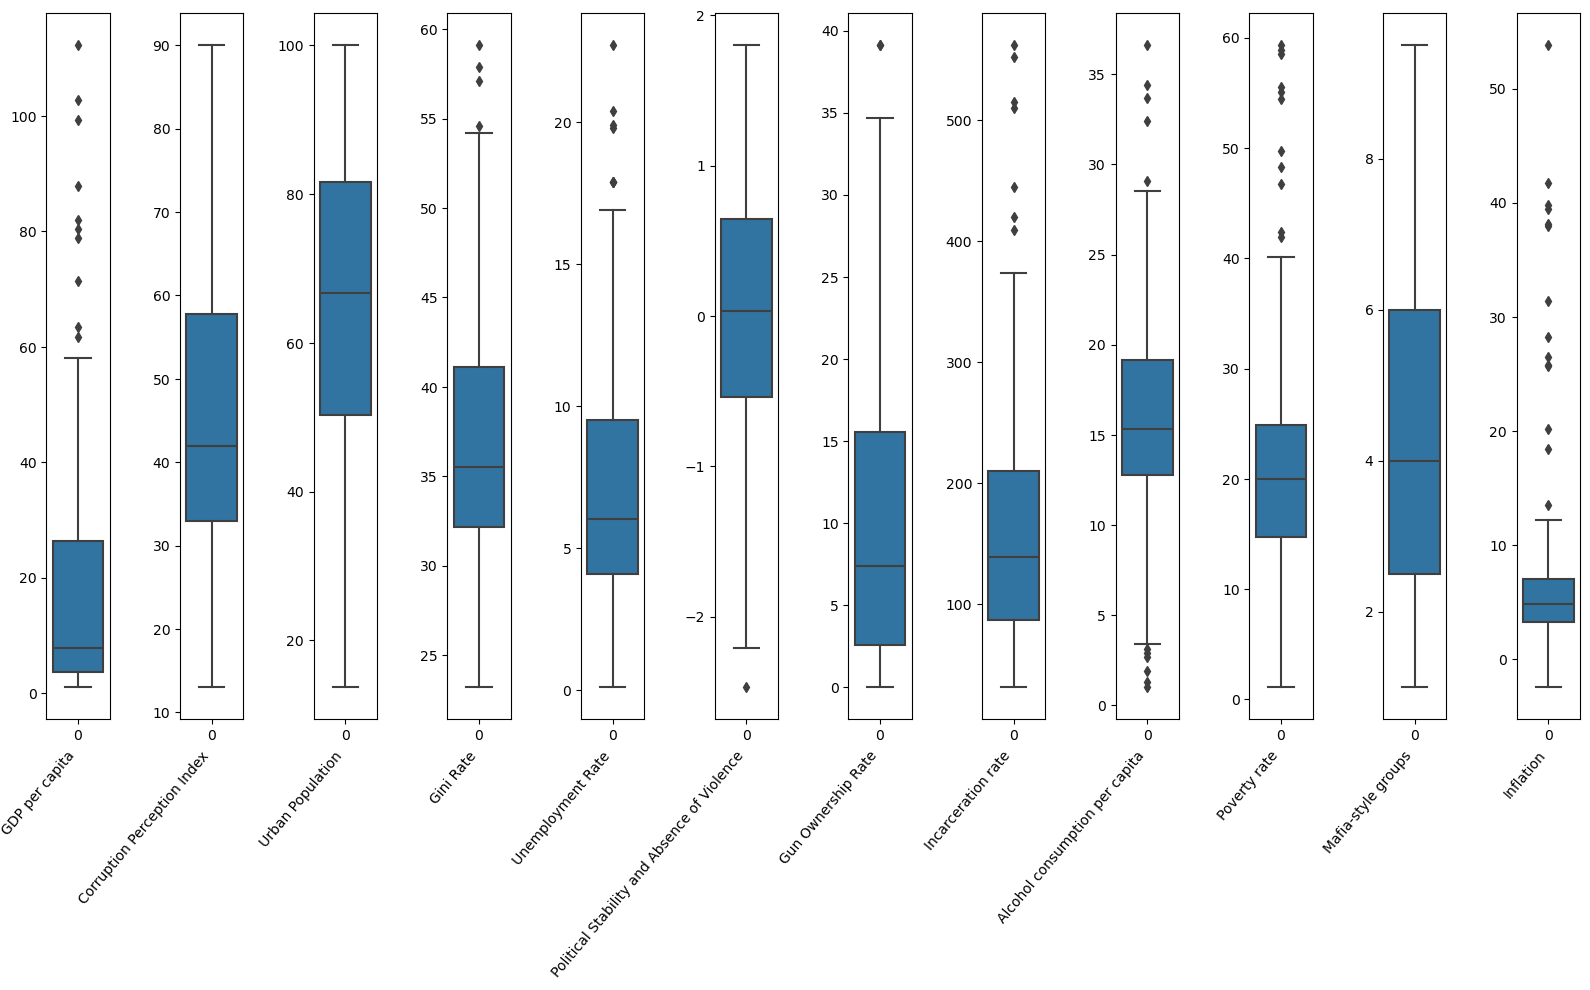

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columns_to_convert[1:]):
    ax = plt.subplot(1, len(columns_to_convert)-1, i+1)
    sns.boxplot(data=data[columns_to_convert][col], orient='v', ax=ax)
    ax.set_xlabel(col, rotation=50, ha='right')

plt.tight_layout()
plt.savefig('boxplot_after_del.png')
plt.show()

In [ ]:
data.to_csv(r"C:\Users\murad\Downloads\crim_index_filledgaps.csv", encoding='utf-8')


In [ ]:
(data[columns_to_convert+instr].corr())

,Criminality,GDP per capita,Corruption Perception Index,Urban Population,Gini Rate,Unemployment Rate,Political Stability and Absence of Violence,Gun Ownership Rate,Incarceration rate,Alcohol consumption per capita,Poverty rate,Mafia-style groups,Inflation,Literacy Rate,Population density
Criminality,1.000000,-0.271342,-0.527399,-0.026152,0.227815,-0.017843,-0.632187,-0.078218,0.083408,0.051381,0.202160,0.636615,0.069981,-0.189820,0.005700
GDP per capita,-0.271342,1.000000,0.761880,0.518047,-0.304476,-0.222099,0.514463,0.375482,-0.182355,-0.241017,-0.323907,-0.017318,-0.232790,0.425932,0.024678
Corruption Perception Index,-0.527399,0.761880,1.000000,0.400381,-0.310273,-0.106217,0.706745,0.359942,-0.174053,-0.170776,-0.385862,-0.196269,-0.252624,0.406465,0.094188
Urban Population,-0.026152,0.518047,0.400381,1.000000,-0.126807,0.000195,0.243155,0.374507,0.086930,-0.212962,-0.246075,0.067631,-0.172820,0.439711,-0.109979
Gini Rate,0.227815,-0.304476,-0.310273,-0.126807,1.000000,0.232003,-0.081908,-0.203684,0.274957,0.006261,0.477546,0.109481,0.167220,-0.216217,-0.106872
Unemployment Rate,-0.017843,-0.222099,-0.106217,0.000195,0.232003,1.000000,-0.116323,0.154257,0.136491,0.315923,0.154933,0.042714,0.033045,-0.087807,-0.069061
Political Stability and Absence of Violence,-0.632187,0.514463,0.706745,0.243155,-0.081908,-0.116323,1.000000,0.229754,-0.009897,-0.162773,-0.265873,-0.329967,-0.262278,0.435589,-0.032142
Gun Ownership Rate,-0.078218,0.375482,0.359942,0.374507,-0.203684,0.154257,0.229754,1.000000,-0.087090,-0.019158,-0.204499,0.052777,-0.104599,0.355599,-0.111446
Incarceration rate,0.083408,-0.182355,-0.174053,0.086930,0.274957,0.136491,-0.009897,-0.087090,1.000000,0.210069,-0.049258,0.142300,-0.001075,0.197741,-0.055453
Alcohol consumption per capita,0.051381,-0.241017,-0.170776,-0.212962,0.006261,0.315923,-0.162773,-0.019158,0.210069,1.000000,0.049739,-0.012356,0.101723,0.029257,0.041996


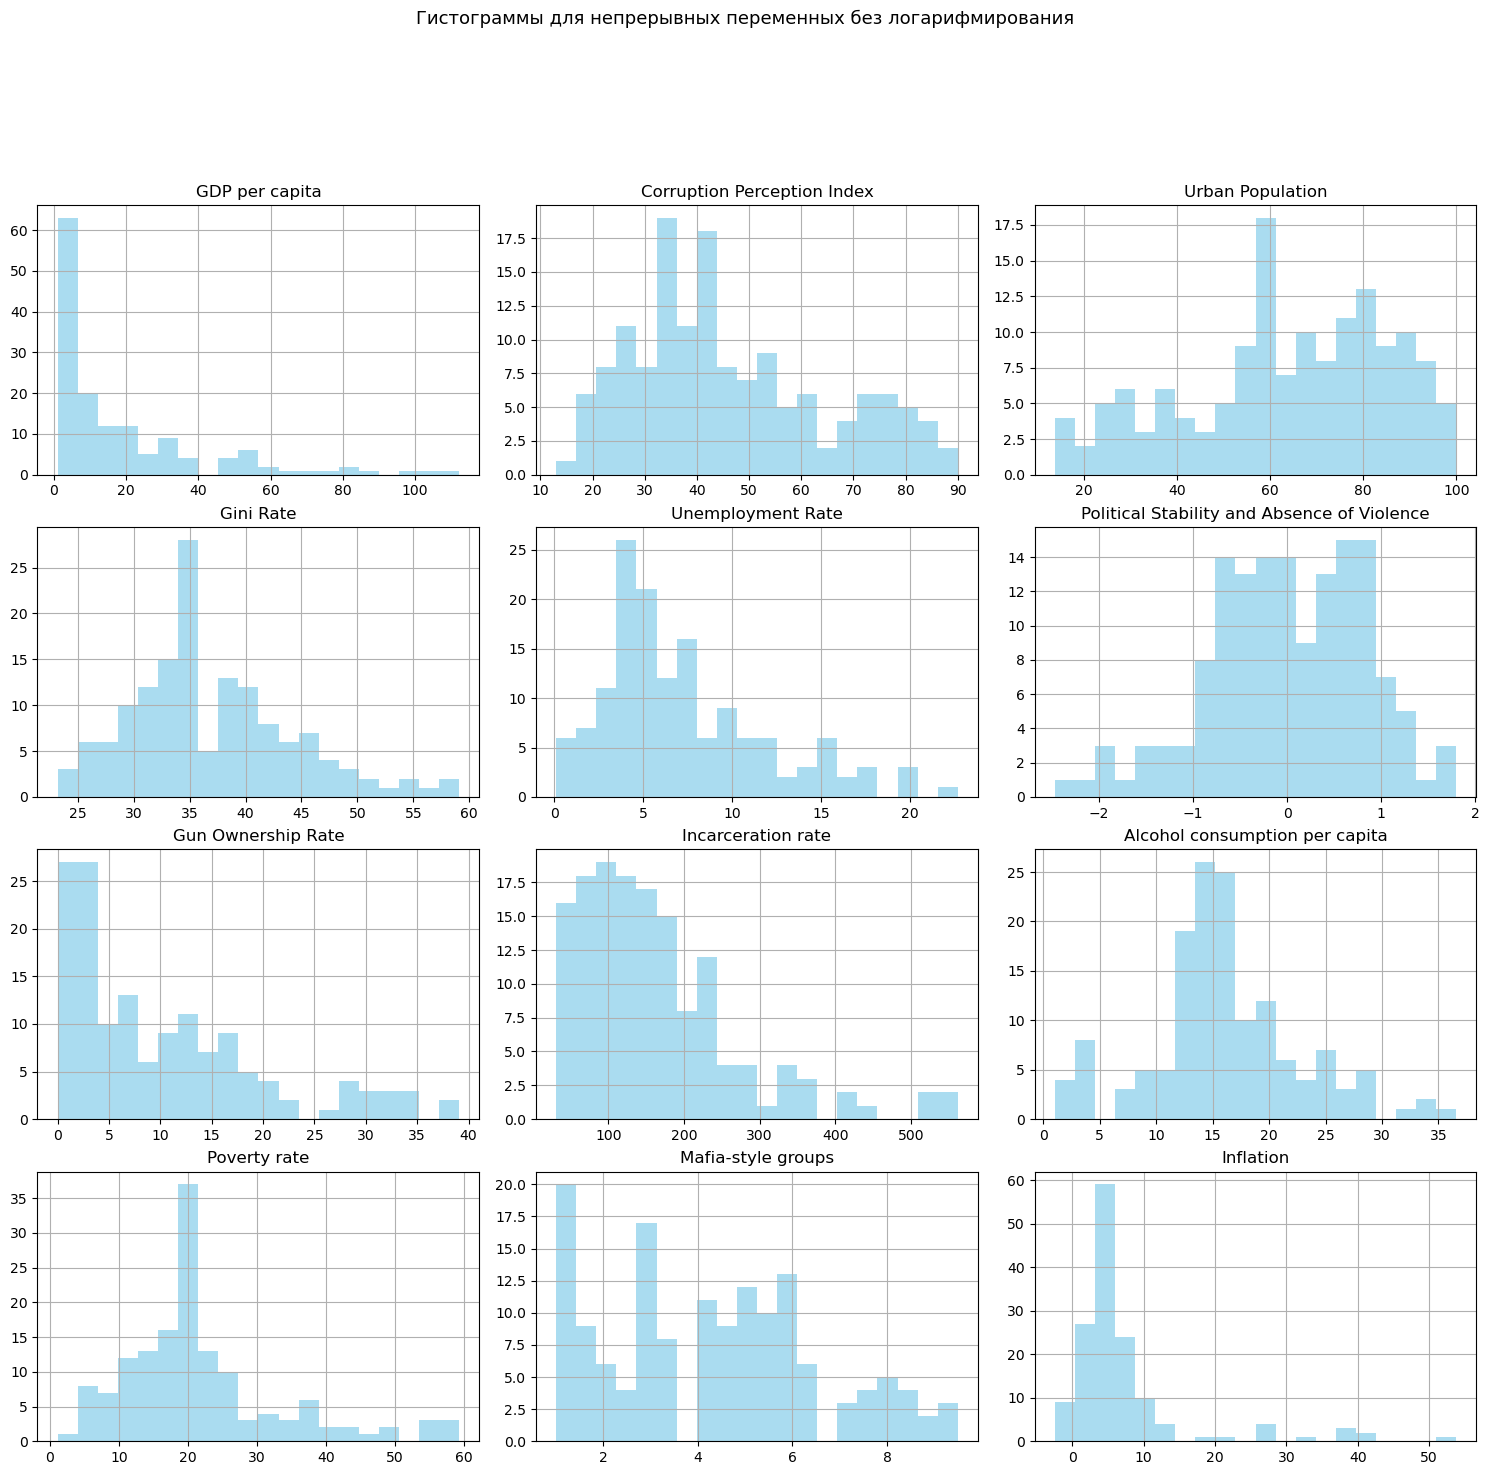

In [ ]:
data[columns_to_convert].iloc[:, 1:].hist(figsize=(15, 15), color='skyblue', alpha=0.7, bins=20, grid=True)
plt.suptitle('Гистограммы для непрерывных переменных без логарифмирования', fontsize=13)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('factors.png', bbox_inches='tight')
plt.show()



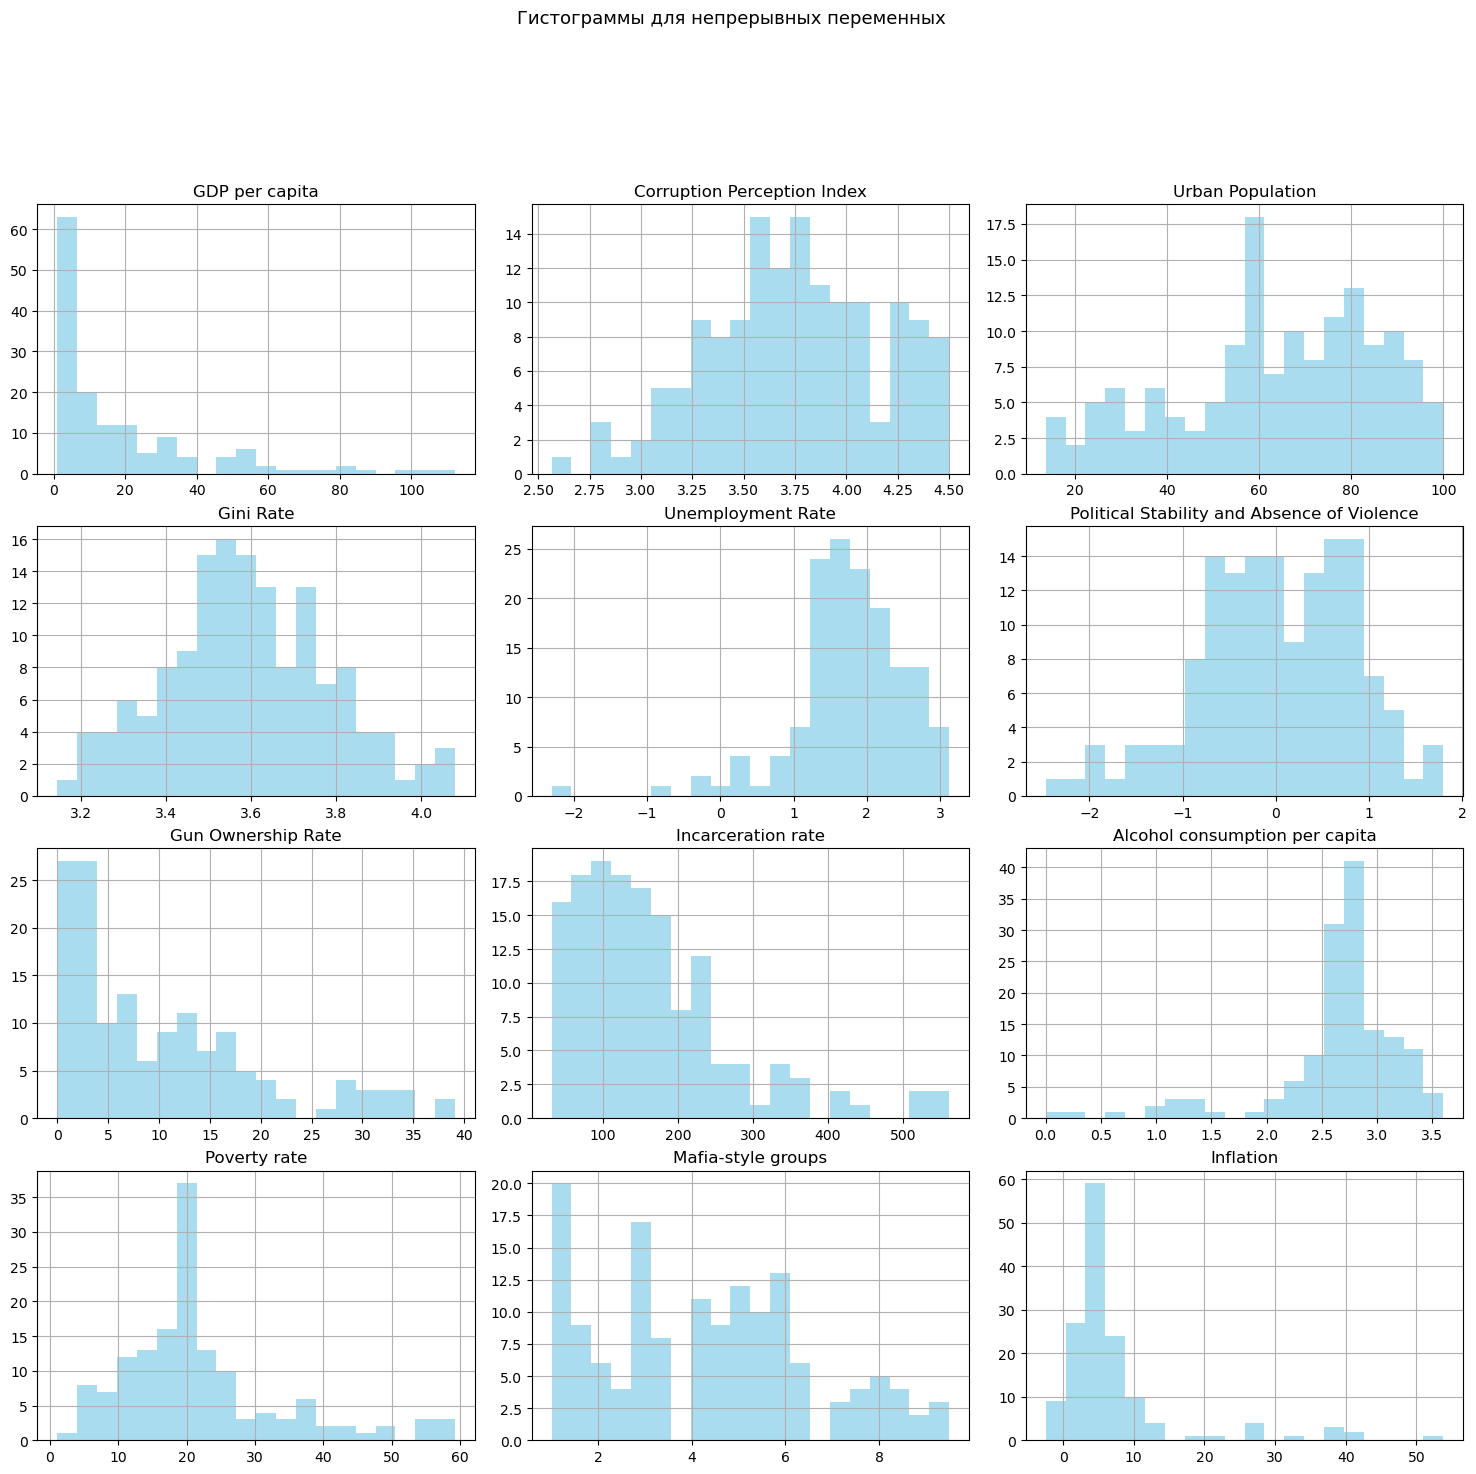

In [ ]:
log_cols = ['Unemployment Rate','Corruption Perception Index','Gini Rate', 'Alcohol consumption per capita', 'Mafia style groups']
data_log = data[columns_to_convert].apply(lambda x: np.log(x) if x.name in log_cols else x)
data_log.iloc[:, 1:].hist(figsize=(15, 15), color='skyblue', alpha=0.7, bins=20, grid=True)
plt.suptitle('Гистограммы для непрерывных переменных', fontsize=13)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('factors_logged.png', bbox_inches='tight')
plt.show()


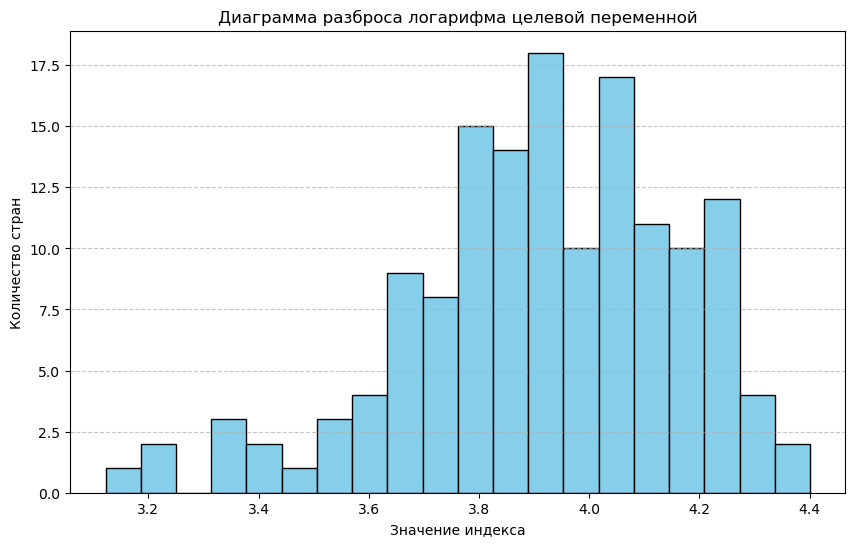

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(data['Criminality']), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Значение индекса')
plt.ylabel('Количество стран')
plt.title('Диаграмма разброса логарифма целевой переменной')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('target.png', bbox_inches='tight')
plt.show()



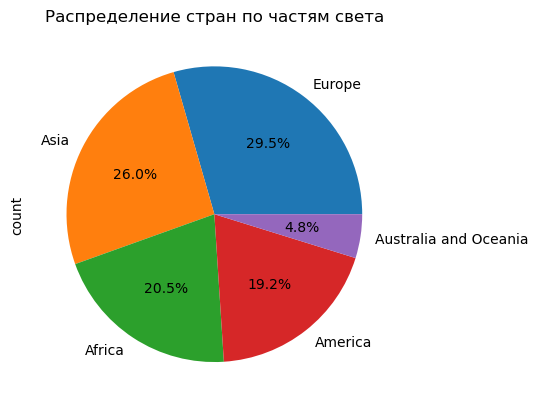

In [ ]:
fig1, ax1 = plt.subplots()
data['Part of the world'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1)
plt.title('Распределение стран по частям света')
plt.savefig('parts.png', bbox_inches='tight')


In [ ]:
import scipy.stats as stats
import pandas as pd
from statsmodels. stats.weightstats import ztest, ttest_ind
alpha = 0.05
#все гипотезы проверяются на уровне значимости = 0.05

# **ГИПОТЕЗЫ**
## **Первая гипотеза:**
Используем новый признак.  


H0: средний уровень преступности в странах с высоким уровнем городского населения (>50%) равен среднему уровню преступности в странах с уровнем городского населения (<=50%)

H1: средний уровень преступности в странах с высоким уровнем городского населения (>50%) выше среднего уровня преступности в странах с уровнем городского населения <=50%


$$
\begin{aligned}
& H_0: \mu_{высокий} = \mu_{низкий} \\
& H_1: \mu_{высокий} > \mu_{низкий}
\end{aligned}
$$


In [ ]:
sample1 = data[data['Urban Population'] > 50].Criminality
sample2 = data[data['Urban Population'] <= 50].Criminality

t_stat, p_value = stats.ttest_ind(sample1, sample2, alternative='greater')

print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу, средний уровень преступности выше в странах с превалирующим уровнем городского населения (>50%)")
else:
    print("Не отвергаем нулевую гипотезу, средний уровень преступности не выше в странах с превалирующим уровнем городского населения (>50%)")


t-статистика: 0.0985606450962099
p-значение: 0.4608120918524349
Не отвергаем нулевую гипотезу, средний уровень преступности не выше в странах с превалирующим уровнем городского населения (>50%)


## **Вторая гипотеза:**




H0: В странах, где среднедушевое количество алкоголя выше среднего, уровень преступности такой же, как в странах с уровнем потребления алкоголя ниже среднего.

H1: В странах, где среднедушевое количество алкоголя выше среднего, уровень преступности выше, чем в странах с уровнем потребления алкоголя ниже среднего.   

$$
\begin{aligned}
& H_0: \mu_{выше} = \mu_{ниже} \\
& H_1: \mu_{выше} > \mu_{ниже}
\end{aligned}
$$

In [ ]:
s1 = data[data['Alcohol consumption per capita'] > data['Alcohol consumption per capita'].mean()].Criminality
s2 = data[data['Alcohol consumption per capita'] <= data['Alcohol consumption per capita'].mean()].Criminality

t_stat, p_value = stats.ttest_ind(s1, s2, alternative='greater')
if p_value < alpha:
    print("Нулевая гипотеза отвергается: есть статистически значимое подтверждение того, что уровень преступности выше в странах с высоким уровнем потребления алкоголя.")
else:
    print("Нулевая гипотеза не отвергается: нет статистически значимого подтверждения того, что уровень преступности выше в странах с высоким уровнем потребления алкоголя.")


Нулевая гипотеза не отвергается: нет статистически значимого подтверждения того, что уровень преступности выше в странах с высоким уровнем потребления алкоголя.


## Третья гипотеза:

H0: Средний уровень преступности в странах Африки равен среднему уровню преступности в странах Азии

H1: Средний уровень преступности в странах Африки выше, чем средний уровень преступности в странах Азии
$$
\begin{aligned}
& H_0: \mu_{Африка} =  \mu_{Азия} \\
& H_1: \mu_{Африка} >  \mu_{Азия}
\end{aligned}
$$

In [ ]:
x = data[data['Part of the world']=='Africa'].Criminality.values
y = data[data['Part of the world']== 'Asia'].Criminality.values

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha)

print(f'{z_obs:.3}  попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза не отвергается')

-1.4  попадает в (-1.64 , 1.64) => Нулевая гипотеза не отвергается
